In [1]:
#Loading necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from pathlib import Path as Path

### Loading Datasets

In [2]:
edxcourses_df=pd.read_csv('edx_courses.csv')
edxcourses_df.head(5)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [3]:
edxuser_df=pd.read_csv('edx_user_data.csv')
edxuser_df.head(5)

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,MITx,6.002x,09/05/2012,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,...,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,6.00x,09/26/2012,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,...,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,3.091x,10/09/2012,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,...,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76
3,HarvardX,CS50x,10/15/2012,Introduction to Computer Science,"David Malan, Nate Hardison, Rob Bowden, Tommy ...",Computer Science,1,1,129400,12888,...,11.11,0,0.00,1.11,220.90,0.00,28.0,80.02,19.98,58.78
4,HarvardX,PH207x,10/15/2012,Health in Numbers: Quantitative Methods in Cli...,"Earl Francis Cook, Marcello Pagano","Government, Health, and Social Science",1,1,52521,10729,...,47.12,77.45,15.98,32.52,804.41,76.10,32.0,56.78,43.22,88.33


In [4]:
udemy_df=pd.read_csv('udemy_courses.csv')
udemy_df.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


### Data Cleaning

In [5]:
#edxcourses_df.dtypes
edxcourses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [232]:
edxcourses_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
n_enrolled,975.0,46705.230769,112823.894275,0.0,8529.5,19687.0,48918.5,2442271.0
course_length,975.0,6.705641,3.150327,1.0,4.0,6.0,8.0,18.0
price,975.0,100.465497,69.572175,5.0,49.0,79.0,149.0,450.0


In [6]:
# Removing extra characters
edxcourses_df['n_enrolled']=edxcourses_df['n_enrolled'].str.replace(',','')
edxcourses_df['price']=edxcourses_df['price'].str.replace('FREE-Add a Verified Certificate for','').str.replace('$','',regex=False).str.replace('USD','')
edxcourses_df['course_length'] = edxcourses_df['course_length'].str.replace('Weeks', '')

In [7]:
# Handling Null values
edxcourses_df['n_enrolled'] = edxcourses_df['n_enrolled'].fillna(0)
edxcourses_df['n_enrolled'] = edxcourses_df['n_enrolled'].astype(int)
edxcourses_df['course_length']=edxcourses_df['course_length'].astype(int)
edxcourses_df['price']=edxcourses_df['price'].astype('float')

In [8]:
edxcourses_df['summary'] = edxcourses_df['summary'].fillna('Unlisted')
edxcourses_df['instructors'] = edxcourses_df['instructors'].fillna('Unlisted')
edxcourses_df['subtitles'] = edxcourses_df['subtitles'].fillna('English')
edxcourses_df['course_description'] = edxcourses_df['course_description'].fillna('Unlisted')
edxcourses_df['course_syllabus'] = edxcourses_df['course_syllabus'].fillna('Unlisted')
edxcourses_df.isna().sum()

title                 0
summary               0
n_enrolled            0
course_type           0
institution           0
instructors           0
Level                 0
subject               0
language              0
subtitles             0
course_effort         0
course_length         0
price                 0
course_description    0
course_syllabus       0
course_url            0
dtype: int64

In [11]:
# Dropping unwanted columns
edxcourses_df=edxcourses_df.drop(['summary','course_description','course_syllabus','course_url'],axis=1)
edxcourses_df.head(5)

,title,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price
0,How to Learn Online,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2,49.0
1,Programming for Everybody (Getting Started wit...,293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7,49.0
2,CS50's Introduction to Computer Science,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12,90.0
3,The Analytics Edge,129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13,199.0
4,Marketing Analytics: Marketing Measurement Str...,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4,249.0


In [14]:
# converting to catgorical columns to save memory and to improve performance
edxcourses_df['Level'] = edxcourses_df['Level'].astype('category')
edxcourses_df['course_type'] = edxcourses_df['course_type'].astype('category')
edxcourses_df.head(5)

,title,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price
0,How to Learn Online,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2,49.0
1,Programming for Everybody (Getting Started wit...,293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7,49.0
2,CS50's Introduction to Computer Science,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12,90.0
3,The Analytics Edge,129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13,199.0
4,Marketing Analytics: Marketing Measurement Str...,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4,249.0


### Data Analysis

#### Questions to be answered:

+ Level:
    - How many levels available
    - Which level has most courses
    - which level has most enrolled
    - Max price for each level
    - Max course length for each level
    
+ Subject:
    - What are unique subjects and count of them
    - How many subjects at each level
    - Most popular subjects
    - Subject with most titles
    
+ Title:
    - Most popular titles and its features like its price,level,course_type,institution
    - Which subject has most popular tiles
    
+ course_type:
    - how many titles in each course type
    - avg price for each course type
    - which course type is most popular

+ price:
    - which course type is pricey
    - Which institution is pricey
    - which level is pricey
    - which subject is pricey
    
    
    


### EDA on Edx Dataset

#### Analysing Levels
+ Level:
    - How many levels available
    - Which level has most courses
    - which level has most enrolled
    - Max price for each level
    - Max course length for each level

In [36]:
edxcourses_df['Level'].unique() 
# 3 levels of courses

['Introductory', 'Intermediate', 'Advanced']
Categories (3, object): ['Advanced', 'Intermediate', 'Introductory']

In [19]:
edxcourses_df['Level'].value_counts()
# Most courses seems to be introductory

Introductory    621
Intermediate    267
Advanced         87
Name: Level, dtype: int64

In [44]:
# which level has most enrolled
grp_level=edxcourses_df.groupby('Level')
grp_level.sum()['n_enrolled'].sort_values(ascending=False)

Level
Introductory    32379441
Intermediate    10159138
Advanced         2999021
Name: n_enrolled, dtype: int32

In [51]:
grp_level.mean()

,n_enrolled,course_length,price
Level,,,
Advanced,34471.505747,8.160920,185.988161
Intermediate,38049.205993,7.033708,99.606330
Introductory,52140.806763,6.360709,88.853462


In [49]:
#Max price for each level
grp_level[['price',''].max()

Level
Advanced        450.0
Intermediate    299.0
Introductory    399.6
Name: price, dtype: float64

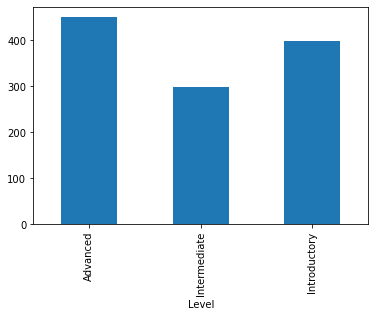

In [57]:
grp_level['price'].max().plot(kind='bar');

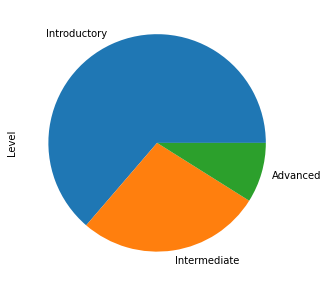

In [53]:
# Plot Distribution of courses in each level with Pie Chart
plt.figure(figsize=(10,5))
edxcourses_df['Level'].value_counts().plot(kind='pie')
plt.show()

+ Analysis:
    - Introductory courses are most popular and has more courses then comes the intermediate level and finally Advanced level.
    - Advanced courses are pricey compared to other levels.

In [67]:
edxcourses_df.groupby('Level')['subject'].value_counts().sort_values(ascending=False)

Level         subject              
Introductory  Computer Science         100
              Business & Management     98
              Humanities                59
Intermediate  Business & Management     55
              Computer Science          51
                                      ... 
Advanced      Language                   1
              Humanities                 1
              Environmental Studies      1
              Communication              1
Introductory  Philanthropy               1
Name: subject, Length: 70, dtype: int64

#### EDA on Subject:
+ Subject:
    - What are unique subjects and count of them
    - How many subjects at each level
    - Most popular subjects
    - Subject with most titles

In [125]:
edxcourses_df['subject'].unique()

array(['Education & Teacher Training', 'Computer Science',
       'Data Analysis & Statistics', 'Business & Management',
       'Communication', 'Health & Safety', 'Math', 'Humanities', 'Ethics',
       'Economics & Finance', 'Food & Nutrition',
       'Biology & Life Sciences', 'Social Sciences', 'Architecture',
       'Medicine', 'Environmental Studies', 'Chemistry', 'Art & Culture',
       'Language', 'Engineering', 'Philosophy & Ethics', 'Electronics',
       'History', 'Literature', 'Physics', 'Law', 'Design', 'Science',
       'Music', 'Energy & Earth Sciences', 'Philanthropy'], dtype=object)

In [108]:
Max_titled_subject=edxcourses_df['subject'].value_counts(sort=True).head(5)
Max_titled_subject
#Computer Science and Business Management subjects are most courses

Computer Science              166
Business & Management         164
Data Analysis & Statistics     72
Humanities                     64
Engineering                    58
Name: subject, dtype: int64

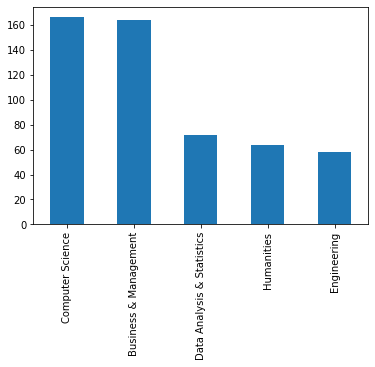

In [113]:
Max_titled_subject.plot(kind='bar');

- computer science and Business & Management seems to have more courses compared to other fields and then comes Data analysis and statistics.

In [110]:
pop_courses=subject_group.sum()['n_enrolled'].sort_values(ascending=False).head(5)
pop_courses

subject
Computer Science              12447737
Business & Management          7076563
Communication                  4641327
Data Analysis & Statistics     4264412
Humanities                     3504140
Name: n_enrolled, dtype: int32

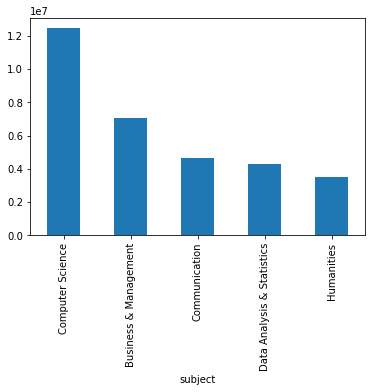

In [114]:
pop_courses.plot(kind='bar');

<AxesSubplot:xlabel='subject'>

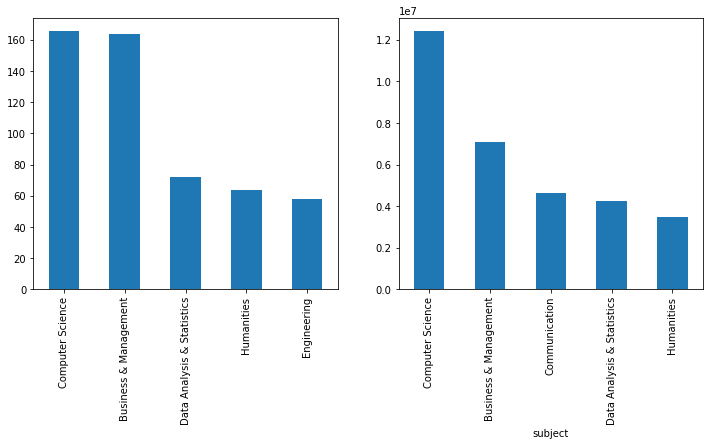

In [124]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 5))
Max_titled_subject.plot.bar(
    ax=axarr[0]
)
pop_courses.plot.bar(
    ax=axarr[1]
)

- Computer Science and Business & Management have more courses and are popular.
- Even though communications has few courses, it seems to be more popular in EDX compared to Data Analysis & statistics

In [227]:
#Lets explore more about the popular courses
lst=list(pop_courses.index)
lst.append('Engineering') # to observe all the popular courses among n_enrolled and titles
df=edxcourses_df[edxcourses_df['subject'].isin(lst)].groupby('subject')['Level'].value_counts()
df

subject                                 
Business & Management       Introductory     98
                            Intermediate     55
                            Advanced         11
Communication               Introductory     31
                            Intermediate      7
                            Advanced          1
Computer Science            Introductory    100
                            Intermediate     51
                            Advanced         15
Data Analysis & Statistics  Introductory     38
                            Intermediate     21
                            Advanced         13
Engineering                 Introductory     22
                            Advanced         20
                            Intermediate     16
Humanities                  Introductory     59
                            Intermediate      4
                            Advanced          1
Name: Level, dtype: int64

In [228]:
df=df.reset_index()

In [229]:
#df=df.drop(columns=['level_0','index'],axis=1)
df

,subject,level_1,Level
0,Business & Management,Introductory,98
1,Business & Management,Intermediate,55
2,Business & Management,Advanced,11
3,Communication,Introductory,31
4,Communication,Intermediate,7
5,Communication,Advanced,1
6,Computer Science,Introductory,100
7,Computer Science,Intermediate,51
8,Computer Science,Advanced,15
9,Data Analysis & Statistics,Introductory,38


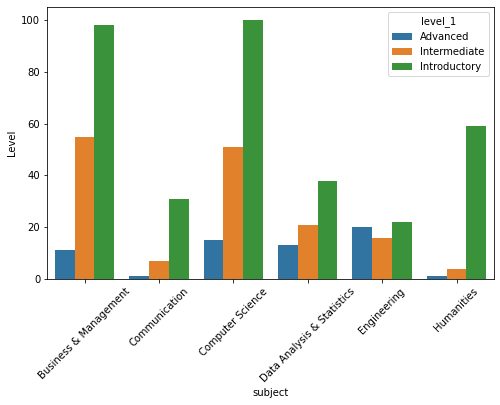

In [230]:
# Using Seaborn 
plt.figure(figsize=(8,5))
sns.barplot(x='subject',y='Level', hue='level_1',data=df,ci=None)
plt.xticks(rotation=45)
plt.show()

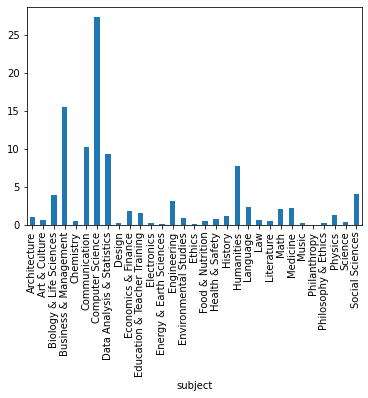

In [284]:
#percentage of n_enrolled in top 10 subjects
(100*(edxcourses_df.groupby('subject')['n_enrolled'].sum())/edxcourses_df['n_enrolled'].sum()).plot(kind='bar');

<AxesSubplot:xlabel='subject'>

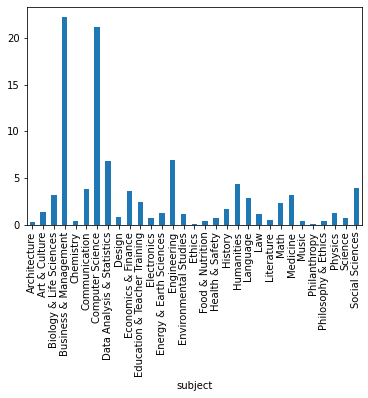

In [304]:
#percentage of price in top 10 subjects
(100*(edxcourses_df.groupby('subject')['price'].sum())/edxcourses_df['price'].sum()).plot(kind='bar')

In [239]:
com_courses=edxcourses_df[(edxcourses_df['subject']=='Communication')& 
                       (edxcourses_df['n_enrolled']!=0)].sort_values('n_enrolled',ascending=False).head(5)
com_courses

,title,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price
29,IELTS Academic Test Preparation,1103777,Self-paced on your time,The University of Queensland,Iain Mathieson-Martin Dutton-Megan Yucel-Steph...,Introductory,Communication,English,English,5–10 hours per week,8,99.0
31,TOEFL® Test Preparation: The Insider’s Guide,1022489,Self-paced on your time,Educational Testing Service,Michael Knab-Cynthia Newman-Shawn Gorman-Molly...,Introductory,Communication,English,English,2–4 hours per week,6,49.0
35,Basic Spanish 1: Getting Started,400169,Self-paced on your time,Universitat Politècnica de Valencia,Prof. Ana Gimeno-Virginia González-Cristina Na...,Introductory,Communication,English,"English, Español",4–5 hours per week,7,40.0
74,Academic and Business Writing,322701,Self-paced on your time,"University of California, Berkeley",Maggie Sokolik,Introductory,Communication,English,English,3–5 hours per week,6,49.0
142,生活英语听说 | Conversational English Skills,301585,Self-paced on your time,Tsinghua University,Wenxia Zhang-Fang Yang-Glenn M. Davis-Thomas H...,Introductory,Communication,English,English,2–4 hours per week,10,49.0


<AxesSubplot:xlabel='n_enrolled', ylabel='title'>

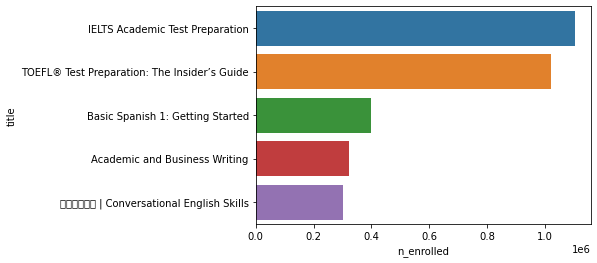

In [289]:
# Hide All Warnings
import warnings
warnings.filterwarnings('ignore')
sns.barplot(x = 'n_enrolled', y = 'title', data = com_courses)

- Top 5 courses in communication IELTS Academic Test Preparation and TOEFL test preparation titles are more popular in communications course

In [253]:
temp_df=edxcourses_df[(edxcourses_df['subject']=='Business & Management') & 
                       (edxcourses_df['n_enrolled']!=0)].sort_values('n_enrolled',ascending=False).head(5)
temp_df

,title,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price
24,Contract Law: From Trust to Promise to Contract,414181,Self-paced on your time,Harvard University,Charles Fried,Intermediate,Business & Management,English,English,3–6 hours per week,8,125.0
249,The Science of Everyday Thinking,318399,Self-paced on your time,The University of Queensland,Emma MacKenzie-Jason Tangen-Matthew Thompson,Introductory,Business & Management,English,English,2–3 hours per week,12,99.0
150,Gestión de Proyectos de Desarrollo,306286,Self-paced on your time,Inter-American Development Bank,Ernesto Mondelo-Claudia Baca,Introductory,Business & Management,Español,Español,3–4 hours per week,10,49.0
5,Introduction to Project Management,301793,Self-paced on your time,University of Adelaide,Frank Schultmann-Noel Lindsay-Anton Jordaan-Jo...,Introductory,Business & Management,English,English,2–3 hours per week,6,199.0
161,Introduction to Marketing,169126,Self-paced on your time,University of British Columbia,Darren Dahl-Paul Cubbon,Introductory,Business & Management,English,English,3–5 hours per week,6,150.0


<AxesSubplot:xlabel='n_enrolled', ylabel='title'>

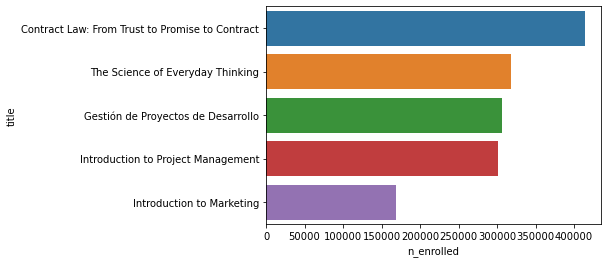

In [288]:
sns.barplot(x = 'n_enrolled', y = 'title', data = temp_df)

- These are the top 5 titles in Business and Management

In [247]:
temp_df=edxcourses_df[(edxcourses_df['subject']=='Data Analysis & Statistics') & 
                       (edxcourses_df['n_enrolled']!=0)].sort_values('n_enrolled',ascending=False)
df=temp_df[['title','n_enrolled','price','Level','course_length']].head(15)
df

,title,n_enrolled,price,Level,course_length
16,Data Science: R Basics,528782,49.0,Introductory,8
38,Statistics and R,314586,249.0,Intermediate,4
27,Data Science: Machine Learning,276209,49.0,Introductory,8
134,Python for Data Science,266978,350.0,Advanced,10
17,Python Basics for Data Science,228809,39.0,Introductory,5
91,Probability - The Science of Uncertainty and Data,205615,300.0,Advanced,16
46,Data Science: Visualization,171258,49.0,Introductory,8
51,Data Science: Probability,135859,49.0,Introductory,8
3,The Analytics Edge,129555,199.0,Intermediate,13
163,Probability and Statistics in Data Science usi...,106286,350.0,Advanced,10


<AxesSubplot:xlabel='price', ylabel='title'>

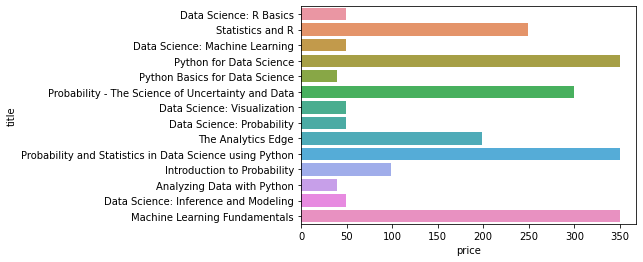

In [286]:
sns.barplot(x = 'price', y = 'title', data = df)

<AxesSubplot:xlabel='n_enrolled', ylabel='title'>

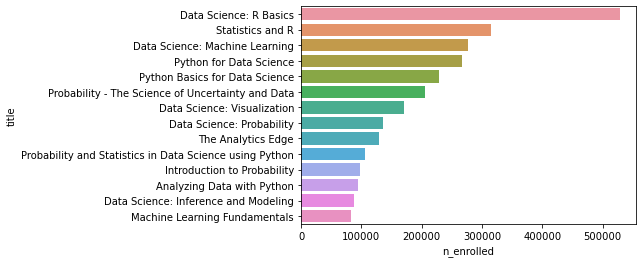

In [285]:
sns.barplot(x = 'n_enrolled', y = 'title', data = df)

<AxesSubplot:xlabel='price', ylabel='n_enrolled'>

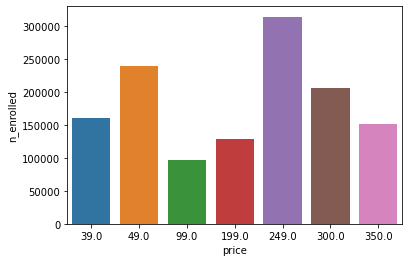

In [287]:
sns.barplot(x = 'price', y = 'n_enrolled', data = df, ci=False)

- There seems to be not much relation between price and n_enrolled. 
- Even though the course is priced 249 it is popular and the next popularity comes to course 49.
- So irrespective of price there are few popular courses.

#### EDA on title:
+ Title:
    - Most popular titles and its features like its price,level,course_type,institution
    - Which subject has most popular tiles
    - Percentage of people enrolled in the popular courses
    - Price comparision with n_enrolled on popular courses 

In [268]:
# Top 10 popular titles -> Titles with max enrolled
pop_titles=edxcourses_df.sort_values('n_enrolled',ascending=False).head(10)
pop_titles

,title,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price
2,CS50's Introduction to Computer Science,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12,90.0
29,IELTS Academic Test Preparation,1103777,Self-paced on your time,The University of Queensland,Iain Mathieson-Martin Dutton-Megan Yucel-Steph...,Introductory,Communication,English,English,5–10 hours per week,8,99.0
31,TOEFL® Test Preparation: The Insider’s Guide,1022489,Self-paced on your time,Educational Testing Service,Michael Knab-Cynthia Newman-Shawn Gorman-Molly...,Introductory,Communication,English,English,2–4 hours per week,6,49.0
23,CS50's Web Programming with Python and JavaScript,698950,Self-paced on your time,Harvard University,David J. Malan-Brian Yu,Intermediate,Computer Science,English,English,6–9 hours per week,12,90.0
64,Introduction to Linux,642088,Self-paced on your time,The Linux Foundation,Jerry Cooperstein,Introductory,Computer Science,English,English,5–7 hours per week,14,199.0
16,Data Science: R Basics,528782,Self-paced on your time,Harvard University,Rafael Irizarry,Introductory,Data Analysis & Statistics,English,English,1–2 hours per week,8,49.0
48,The Science of Happiness,475614,Self-paced on your time,"University of California, Berkeley",Dacher Keltner-Emiliana Simon-Thomas,Introductory,Social Sciences,English,English,4–5 hours per week,11,169.0
24,Contract Law: From Trust to Promise to Contract,414181,Self-paced on your time,Harvard University,Charles Fried,Intermediate,Business & Management,English,English,3–6 hours per week,8,125.0
30,The Architectural Imagination,406181,Self-paced on your time,Harvard University,Lisa Haber-Thomson-K. Michael Hays-Erika Nagin...,Introductory,Architecture,English,English,3–5 hours per week,10,99.0
35,Basic Spanish 1: Getting Started,400169,Self-paced on your time,Universitat Politècnica de Valencia,Prof. Ana Gimeno-Virginia González-Cristina Na...,Introductory,Communication,English,"English, Español",4–5 hours per week,7,40.0


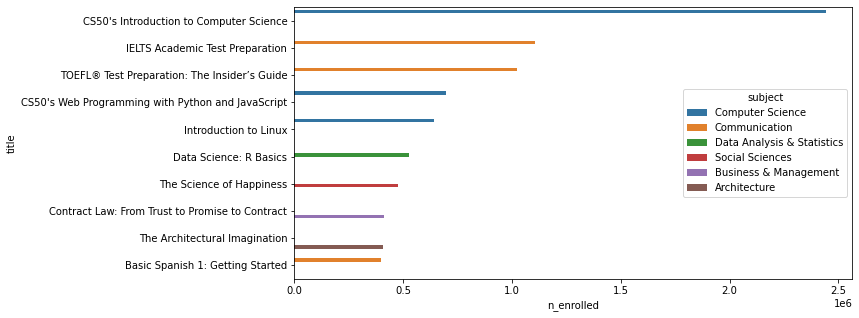

In [279]:
plt.figure(figsize=(10,5))
sns.barplot(x='n_enrolled',y='title', hue='subject',data=pop_titles,ci=None)
plt.show()

In [318]:
pop_titles['%n_enrolled']=100*pop_titles['n_enrolled']/edxcourses_df['n_enrolled'].sum()
pop_titles[['title','%n_enrolled']]

,title,%n_enrolled
2,CS50's Introduction to Computer Science,5.363197
29,IELTS Academic Test Preparation,2.423880
31,TOEFL® Test Preparation: The Insider’s Guide,2.245373
23,CS50's Web Programming with Python and JavaScript,1.534885
64,Introduction to Linux,1.410017
16,Data Science: R Basics,1.161199
48,The Science of Happiness,1.044442
24,Contract Law: From Trust to Promise to Contract,0.909536
30,The Architectural Imagination,0.891968
35,Basic Spanish 1: Getting Started,0.878766


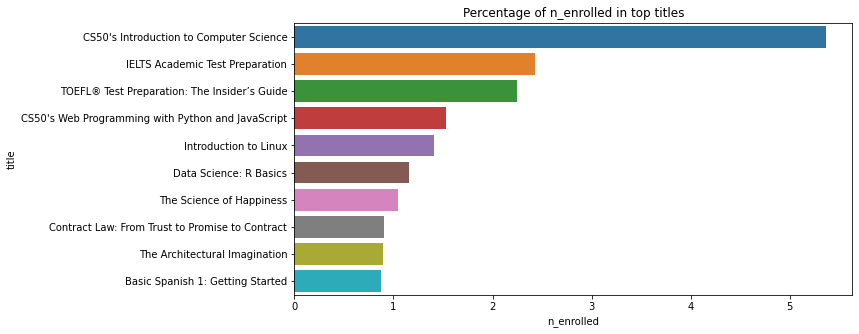

In [302]:
plt.figure(figsize=(10,5))
sns.barplot(x=(100*pop_titles['n_enrolled']/edxcourses_df['n_enrolled'].sum()),y=pop_titles['title'])
plt.title('Percentage of n_enrolled in top titles')
plt.show()

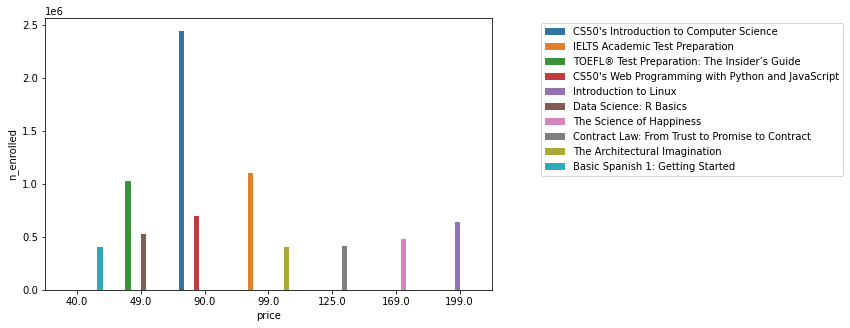

In [329]:
#comparision between price and n_enrolled in popular titles
# Using Seaborn 
plt.figure(figsize=(8,5))
sns.barplot(x='price',y='n_enrolled', hue='title',data=pop_titles,ci=None)
plt.legend(bbox_to_anchor=(1.1,1))
plt.show()

- Not much correlation is seen between price and n_enrolled as much cheaper courses are not popular.


In [332]:
pop_titles.head(6)

,title,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,%n_enrolled
2,CS50's Introduction to Computer Science,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12,90.0,5.363197
29,IELTS Academic Test Preparation,1103777,Self-paced on your time,The University of Queensland,Iain Mathieson-Martin Dutton-Megan Yucel-Steph...,Introductory,Communication,English,English,5–10 hours per week,8,99.0,2.423880
31,TOEFL® Test Preparation: The Insider’s Guide,1022489,Self-paced on your time,Educational Testing Service,Michael Knab-Cynthia Newman-Shawn Gorman-Molly...,Introductory,Communication,English,English,2–4 hours per week,6,49.0,2.245373
23,CS50's Web Programming with Python and JavaScript,698950,Self-paced on your time,Harvard University,David J. Malan-Brian Yu,Intermediate,Computer Science,English,English,6–9 hours per week,12,90.0,1.534885
64,Introduction to Linux,642088,Self-paced on your time,The Linux Foundation,Jerry Cooperstein,Introductory,Computer Science,English,English,5–7 hours per week,14,199.0,1.410017
16,Data Science: R Basics,528782,Self-paced on your time,Harvard University,Rafael Irizarry,Introductory,Data Analysis & Statistics,English,English,1–2 hours per week,8,49.0,1.161199


- Most popular titles are introductory and self-paced.
- popular titles belong to computer science and communication.
- Harvard university courses are popular.
- CS50's Introduction to Computer Science , IELTS Academic Test Preparation	,TOEFL® Test Preparation: The Insider’s Guide are top courses with 5%, 2.5%, 2.2% people enrolled respectively.

##### EDA on course_type:

- how many titles in each course type
- avg price for each course type
- which course type is most popular

In [335]:
edxcourses_df['course_type'].unique()

['Self-paced on your time', 'Instructor-led on a course schedule']
Categories (2, object): ['Instructor-led on a course schedule', 'Self-paced on your time']

In [344]:
# number of titles in each course type
edxcourses_df.groupby('course_type')['title'].count()

course_type
Instructor-led on a course schedule     58
Self-paced on your time                917
Name: title, dtype: int64

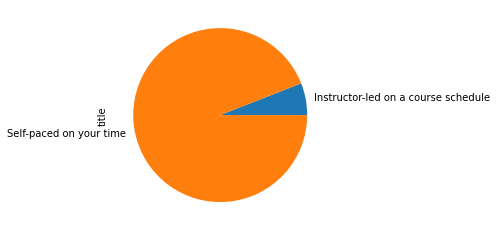

In [345]:
# plot to show number of titles in each course type
edxcourses_df.groupby('course_type')['title'].count().plot(kind='pie');

In [346]:
# avg price for each course type
edxcourses_df.groupby('course_type')['price'].mean()

course_type
Instructor-led on a course schedule    197.310345
Self-paced on your time                 94.340087
Name: price, dtype: float64

In [347]:
# which course type is most popular
edxcourses_df.groupby('course_type')['n_enrolled'].sum()

course_type
Instructor-led on a course schedule     2370772
Self-paced on your time                43166828
Name: n_enrolled, dtype: int32

- Self paced courses are 917 and instructor led courses are 58.
- Instructor led courses are charged double the price of self-paced.
- Self Paced courses are most preferred.

In [356]:
top_courses=edxcourses_df[edxcourses_df.course_type=='Instructor-led on a course schedule'].sort_values('n_enrolled',ascending=False).head(5)
top_courses

,title,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price
153,Artificial Intelligence (AI),265104,Instructor-led on a course schedule,Columbia University,Ansaf Salleb-Aouissi,Advanced,Computer Science,English,English,8–10 hours per week,12,249.0
91,Probability - The Science of Uncertainty and Data,205615,Instructor-led on a course schedule,Massachusetts Institute of Technology,John Tsitsiklis-Dimitri Bertsekas-Patrick Jail...,Advanced,Data Analysis & Statistics,English,English,10–14 hours per week,16,300.0
260,Machine Learning,150855,Instructor-led on a course schedule,Columbia University,John W. Paisley,Advanced,Computer Science,English,English,8–10 hours per week,12,249.0
139,Introduction to Biology - The Secret of Life,147512,Instructor-led on a course schedule,Massachusetts Institute of Technology,Eric S. Lander-Michelle Mischke-Graham Walker-...,Introductory,Biology & Life Sciences,English,"English, 中文",5–10 hours per week,16,150.0
129,Supply Chain Analytics,145049,Instructor-led on a course schedule,Massachusetts Institute of Technology,Chris Caplice,Introductory,Business & Management,English,English,8–12 hours per week,15,199.0


- Columbia University and Massachusetts Institute of Technology are the top institutions preferred for Instructor led courses
- Most Instructor led courses are Advanced.

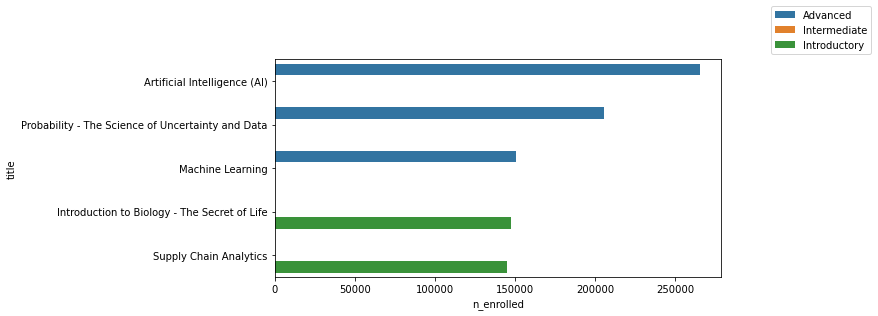

In [365]:
plt.figure(figsize=(8,4))
sns.barplot(x='n_enrolled',y='title', hue='Level',data=top_courses,ci=None)
plt.legend(bbox_to_anchor=(1.1,1))
plt.show()